<a href="https://colab.research.google.com/github/nazalnihad/AI_for_good/blob/main/err_surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/lin_vals.csv")

In [5]:
df

x     z
0  -10 -38.5
1   -9 -32.5
2   -8 -28.5
3   -7 -24.5
4   -6 -21.5
5   -5 -17.5
6   -4 -12.5
7   -3 -11.5
8   -2  -6.5
9   -1   0.5
10   0   3.5
11   1   4.5
12   2   9.5
13   3  12.5
14   4  20.5
15   5  24.5
16   6  25.5
17   7  28.5
18   8  32.5
19   9  40.5
20  10  43.5

In [20]:
m = np.arange(-10, 10, 0.1)
c = np.arange(-10, 10, 0.1)

In [7]:
# mc_set = [(i,j) for i,j in zip(m,c)]

In [8]:
mc = []
for i in m:
    for j in c:
        mc.append((i, j))

In [9]:
len(mc)

40000

In [19]:
X = df['x']
Y = df['z']

In [11]:
err = np.zeros(len(mc))

for index, (i, j) in enumerate(mc):
    pred_y = i * X + j
    error = np.sum(np.abs(Y - pred_y))
    err[index] = error

err = err.reshape(len(m), len(c))


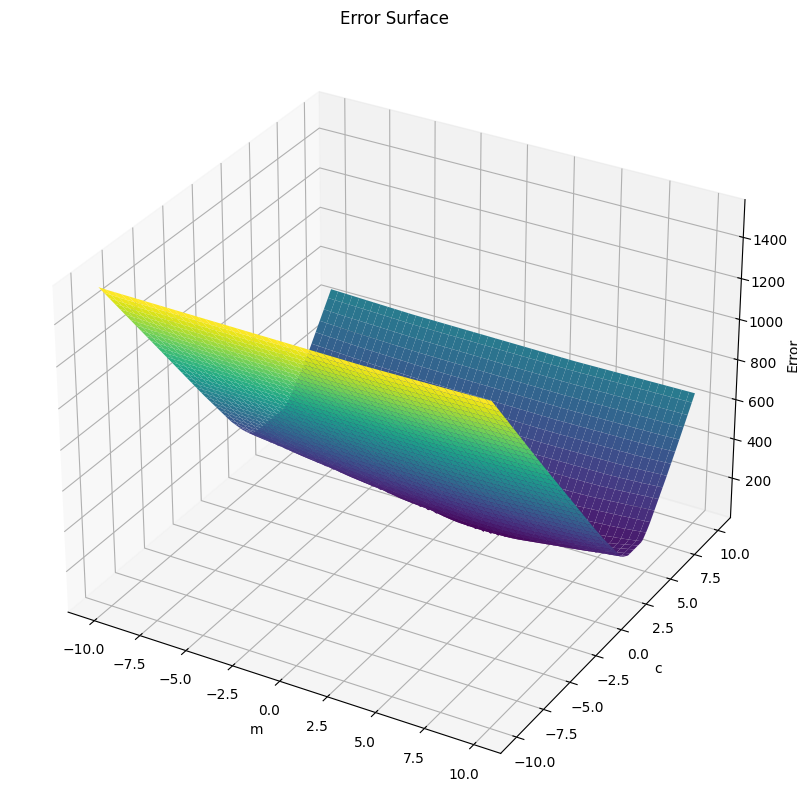

In [12]:
M, C = np.meshgrid(m, c)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, err, cmap='viridis')

ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Error')
plt.title('Error Surface')
plt.show()

Optimal m: 3.9844155844155815, Optimal c: 2.162338693883291


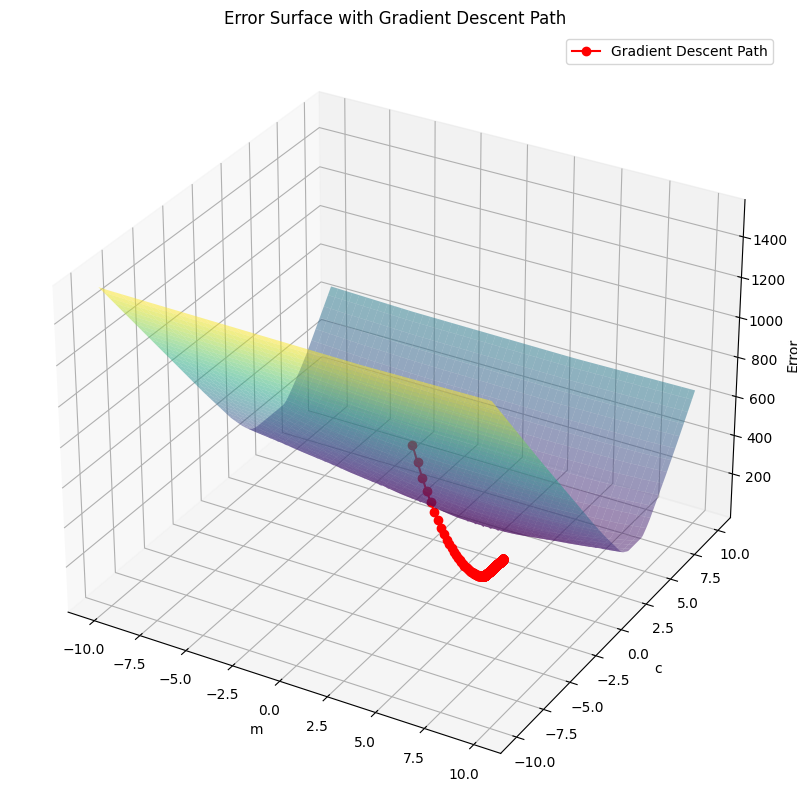

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient_descent(X, Y, learning_rate=0.001, epochs=1000):
    m_curr = 0
    c_curr = 0
    n = len(X)
    error_history = []
    m_history = []
    c_history = []

    for i in range(epochs):
        y_predicted = m_curr * X + c_curr
        cost = (1/n) * sum([val**2 for val in (Y - y_predicted)])
        md = -(2/n) * sum(X * (Y - y_predicted))
        cd = -(2/n) * sum(Y - y_predicted)
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd

        error_history.append(cost)
        m_history.append(m_curr)
        c_history.append(c_curr)

    return m_curr, c_curr, error_history, m_history, c_history


m_optimal, c_optimal, error_history, m_history, c_history = gradient_descent(X, Y)

print(f"Optimal m: {m_optimal}, Optimal c: {c_optimal}")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, err, cmap='viridis', alpha=0.5)

# Plot the path of gradient descent on the error surface
ax.plot(m_history, c_history, error_history, marker='o', linestyle='-', color='red', label='Gradient Descent Path')

ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Error')
plt.title('Error Surface with Gradient Descent Path')
plt.legend()
plt.show()


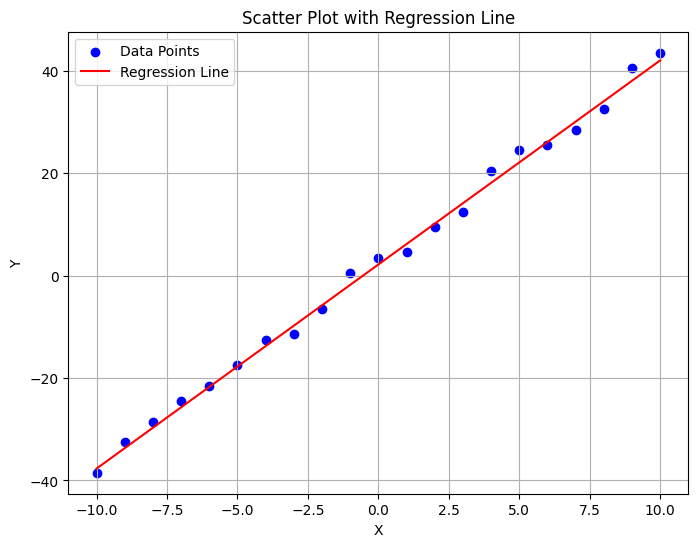

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


y_predicted = m_optimal * X + c_optimal
error = Y - y_predicted

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
import numpy as np
import plotly.graph_objs as go
import pandas as pd

def calculate_error(X, Y, m_values, c_values):
    M, C = np.meshgrid(m_values, c_values)
    err = np.zeros(M.shape)

    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            m = M[i, j]
            c = C[i, j]
            y_pred = m * X + c
            err[i, j] = np.sum(np.abs(Y - y_pred))

    return M, C, err

X = df['x'].values
Y = df['z'].values

m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)
M, C, err = calculate_error(X, Y, m_values, c_values)

fig = go.Figure()

# Add surface
fig.add_trace(go.Surface(z=err, x=M, y=C, colorscale='Viridis', opacity=0.5, name='Error Surface'))

# Randomly select initial values for m and c
initial_m = np.random.choice(m_values)
initial_c = np.random.choice(c_values)
current_m = initial_m
current_c = initial_c

# Initialize histories
m_history = []
c_history = []

# Perform gradient descent
learning_rate = 0.001
num_iterations = 1000

for _ in range(num_iterations):
    y_pred = current_m * X + current_c

    m_gradient = np.mean((y_pred - Y) * X)
    c_gradient = np.mean(y_pred - Y)

    current_m -= learning_rate * m_gradient
    current_c -= learning_rate * c_gradient

    m_history.append(current_m)
    c_history.append(current_c)

# Calculate the error for the gradient descent path
error_path = [calculate_error(X, Y, [m], [c])[2][0, 0] for m, c in zip(m_history, c_history)]

# Add gradient descent path
fig.add_trace(go.Scatter3d(x=m_history, y=c_history, z=error_path, mode='lines+markers',
                             marker=dict(size=5, color='red'), name='Gradient Descent Path'))

# Update layout
fig.update_layout(title='Error Surface with Gradient Descent Path',
                  scene=dict(xaxis_title='m',
                             yaxis_title='c',
                             zaxis_title='Error'),
                  width=800, height=800)

# Show plot
fig.show()
print(current_c,current_m)


-1.1034151627554538 3.98441558441559


Optimal m: 3.9844155844155815, Optimal c: 2.162338693883291


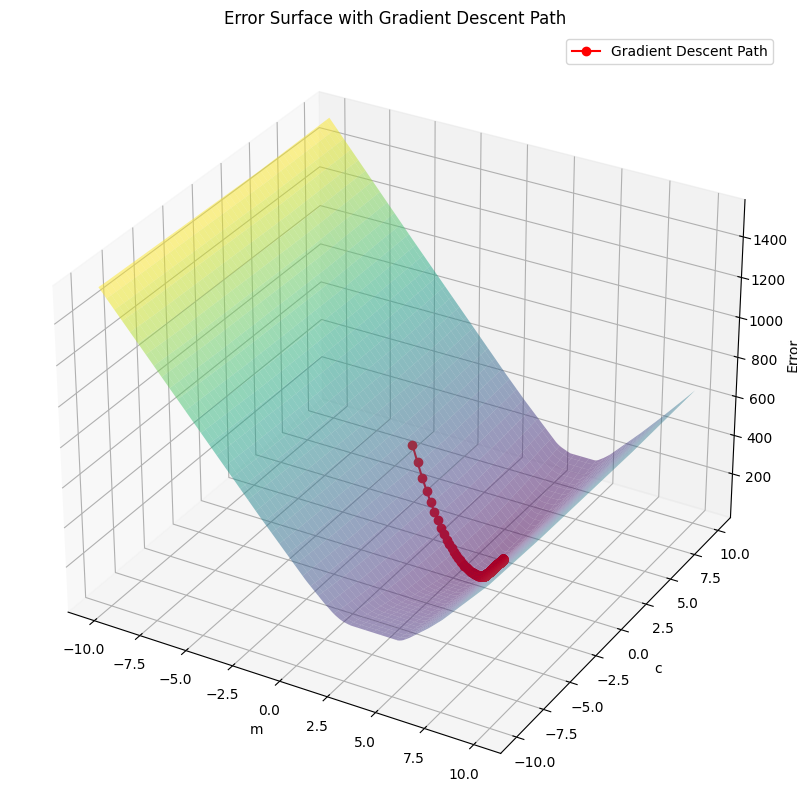

4.706172548625763 3.984415584415579


In [39]:
def batch_gradient_descent(X, Y, learning_rate=0.001, epochs=1000):
    m_curr = 0
    c_curr = 0
    n = len(X)
    error_history = []
    m_history = []
    c_history = []

    for i in range(epochs):
        y_predicted = m_curr * X + c_curr
        cost = (1/n) * sum([val**2 for val in (Y - y_predicted)])
        md = -(2/n) * sum(X * (Y - y_predicted))
        cd = -(2/n) * sum(Y - y_predicted)
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd

        error_history.append(cost)
        m_history.append(m_curr)
        c_history.append(c_curr)

    return m_curr, c_curr, error_history, m_history, c_history

m_optimal, c_optimal, error_history, m_history, c_history = batch_gradient_descent(X, Y)

print(f"Optimal m: {m_optimal}, Optimal c: {c_optimal}")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, err, cmap='viridis', alpha=0.5)

# Plot the path of gradient descent on the error surface
ax.plot(m_history, c_history, error_history, marker='o', linestyle='-', color='red', label='Gradient Descent Path')

ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Error')
plt.title('Error Surface with Gradient Descent Path')
plt.legend()
plt.show()

y_predicted = m_optimal * X + c_optimal
error = Y - y_predicted


def calculate_error(X, Y, m_values, c_values):
    M, C = np.meshgrid(m_values, c_values)
    err = np.zeros(M.shape)

    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            m = M[i, j]
            c = C[i, j]
            y_pred = m * X + c
            err[i, j] = np.sum(np.abs(Y - y_pred))

    return M, C, err

X = df['x'].values
Y = df['z'].values

m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)
M, C, err = calculate_error(X, Y, m_values, c_values)

fig = go.Figure()

# Add surface
fig.add_trace(go.Surface(z=err, x=M, y=C, colorscale='Viridis', opacity=0.5, name='Error Surface'))

# Randomly select initial values for m and c
initial_m = np.random.choice(m_values)
initial_c = np.random.choice(c_values)
current_m = initial_m
current_c = initial_c

# Initialize histories
m_history = []
c_history = []

# Perform gradient descent
learning_rate = 0.001
num_iterations = 1000

for _ in range(num_iterations):
    y_pred = current_m * X + current_c

    m_gradient = np.mean((y_pred - Y) * X)
    c_gradient = np.mean(y_pred - Y)

    current_m -= learning_rate * m_gradient
    current_c -= learning_rate * c_gradient

    m_history.append(current_m)
    c_history.append(current_c)

# Calculate the error for the gradient descent path
error_path = [calculate_error(X, Y, [m], [c])[2][0, 0] for m, c in zip(m_history, c_history)]

# Add gradient descent path
fig.add_trace(go.Scatter3d(x=m_history, y=c_history, z=error_path, mode='lines+markers',
                             marker=dict(size=5, color='red'), name='Gradient Descent Path'))

# Update layout
fig.update_layout(title='Error Surface with Gradient Descent Path',
                  scene=dict(xaxis_title='m',
                             yaxis_title='c',
                             zaxis_title='Error'),
                  width=800, height=800)

# Show plot
fig.show()
print(current_c,current_m)


In [45]:
# prompt: use mini batch gradient descent for above and also plot with plotly

def mini_batch_gradient_descent(X, Y, batch_size=10, learning_rate=0.001, epochs=1000):
    m_curr = 0
    c_curr = 0
    n = len(X)
    error_history = []
    m_history = []
    c_history = []

    for i in range(epochs):
        # Generate random indices for the mini-batch
        indices = np.random.choice(n, size=batch_size, replace=False)
        X_batch = X[indices]
        Y_batch = Y[indices]

        y_predicted = m_curr * X_batch + c_curr
        cost = (1/batch_size) * sum([val**2 for val in (Y_batch - y_predicted)])
        md = -(2/batch_size) * sum(X_batch * (Y_batch - y_predicted))
        cd = -(2/batch_size) * sum(Y_batch - y_predicted)
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd

        error_history.append(cost)
        m_history.append(m_curr)
        c_history.append(c_curr)

    return m_curr, c_curr, error_history, m_history, c_history


m_optimal, c_optimal, error_history, m_history, c_history = mini_batch_gradient_descent(X, Y)

print(f"Optimal m: {m_optimal}, Optimal c: {c_optimal}")

fig = go.Figure()

# Add surface
fig.add_trace(go.Surface(z=err, x=M, y=C, colorscale='Viridis', opacity=0.5, name='Error Surface'))

# Calculate the error for the gradient descent path
error_path = [calculate_error(X, Y, [m], [c])[2][0, 0] for m, c in zip(m_history, c_history)]

# Add gradient descent path
fig.add_trace(go.Scatter3d(x=m_history, y=c_history, z=error_path, mode='lines+markers',
                             marker=dict(size=5, color='red'), name='Mini-Batch Gradient Descent Path'))

# Update layout
fig.update_layout(title='Error Surface with Mini-Batch Gradient Descent Path',
                  scene=dict(xaxis_title='m',
                             yaxis_title='c',
                             zaxis_title='Error'),
                  width=800, height=800)

# Show plot
fig.show()

print(current_c,current_m)


Optimal m: 4.000972394092489, Optimal c: 2.171189794006024


4.706172548625763 3.984415584415579
